In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

C:\Users\saraa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('final_scout_not_dummy.csv')

df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [3]:
df.shape

(15915, 23)

In [4]:
df.describe(include="O")

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
count,15915,15915,15915,15915,15915,15915,15915,15915,15915,15915,15915,15915,15915
unique,9,8,2,5,4,6196,346,659,4442,3,2,3,3
top,Audi A3,Sedans,VAT deductible,Used,Benzine,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Manual,front
freq,3097,8004,15044,11095,8548,388,1737,5785,729,15246,12234,8149,15707


In [5]:
df["Type"].unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered'],
      dtype=object)

In [6]:
df.describe() # no need to scaling, because we have sensible data about high price for car, km...etc

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [8]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

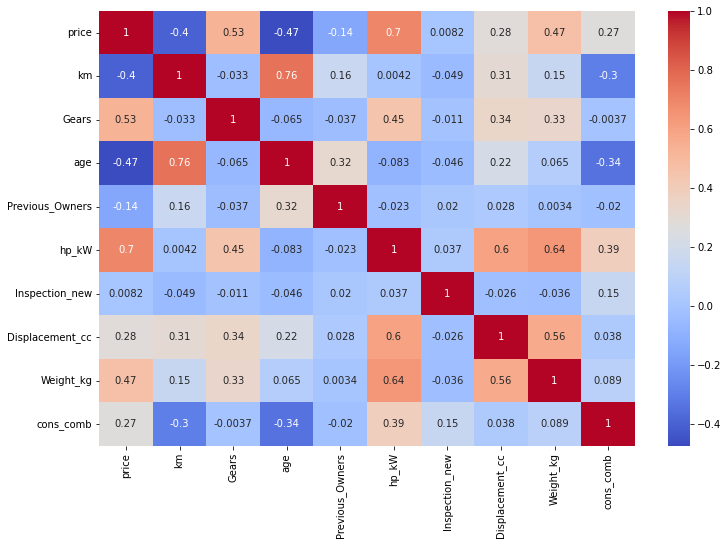

In [9]:
corr_matrix = df.corr(numeric_only= True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show() #here multicollinearity not important, because we focus on the dependent varibale(price) to be predicted

<AxesSubplot:ylabel='price'>

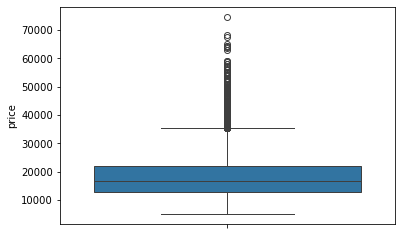

In [10]:
sns.boxplot(df.price )# here the outliers not misleading, so we don't remove it

[Text(0, 0, '3097'),
 Text(0, 0, '2614'),
 Text(0, 0, '2598'),
 Text(0, 0, '2525'),
 Text(0, 0, '2216'),
 Text(0, 0, '1839'),
 Text(0, 0, '991'),
 Text(0, 0, '34'),
 Text(0, 0, '1')]

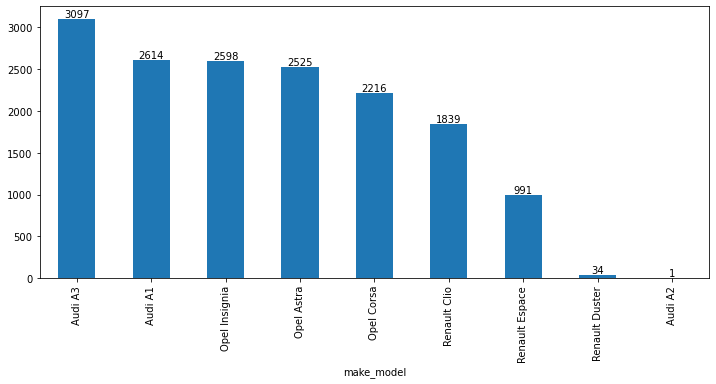

In [11]:
ax = df.make_model.value_counts().plot(kind ="bar", figsize=(12,5))
ax.bar_label(ax.containers[0])

[Text(0, 0, '8149'), Text(0, 0, '7297'), Text(0, 0, '469')]

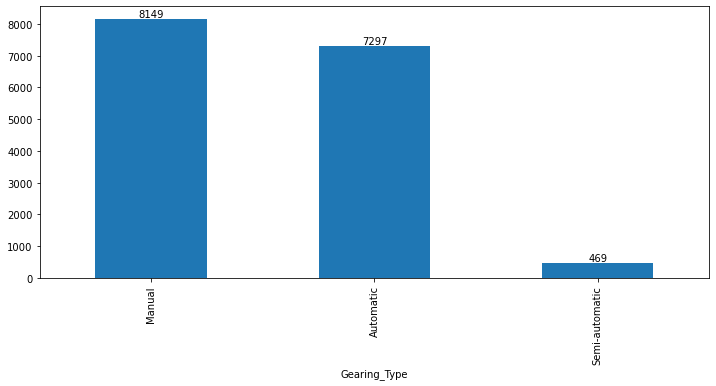

In [12]:
ax3 = df.Gearing_Type.value_counts().plot(kind ="bar", figsize=(12,5))
ax3.bar_label(ax3.containers[0])

In [13]:
df.Gearing_Type.value_counts()

Gearing_Type
Manual            8149
Automatic         7297
Semi-automatic     469
Name: count, dtype: int64

In [14]:
df.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [15]:
final_features =["age", "hp_kW", "km", "Gearing_Type", 'make_model',"Gears", "Weight_kg", 'price'] # choosing most affect features to predict the price

In [16]:
df= df[final_features]
df

,age,hp_kW,km,Gearing_Type,make_model,Gears,Weight_kg,price
0,3.0,66.0,56013.000000,Automatic,Audi A1,7.0,1220.0,15770
1,2.0,141.0,80000.000000,Automatic,Audi A1,7.0,1255.0,14500
2,3.0,85.0,83450.000000,Automatic,Audi A1,7.0,1135.0,14640
3,3.0,66.0,73000.000000,Automatic,Audi A1,6.0,1195.0,14500
4,3.0,66.0,16200.000000,Automatic,Audi A1,7.0,1135.0,16790
...,...,...,...,...,...,...,...,...
15910,0.0,147.0,1647.362609,Automatic,Renault Espace,6.0,1758.0,39950
15911,0.0,165.0,9900.000000,Automatic,Renault Espace,7.0,1708.0,39885
15912,0.0,146.0,15.000000,Automatic,Renault Espace,6.0,1734.0,39875
15913,0.0,147.0,10.000000,Automatic,Renault Espace,6.0,1758.0,39700


In [17]:
X=df[["age", "hp_kW", "km", "Gearing_Type", 'make_model',"Weight_kg","Gears"]]
y=df[['price']]

In [18]:
X["Gearing_Type"].unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [19]:
X.head()

,age,hp_kW,km,Gearing_Type,make_model,Weight_kg,Gears
0,3.0,66.0,56013.0,Automatic,Audi A1,1220.0,7.0
1,2.0,141.0,80000.0,Automatic,Audi A1,1255.0,7.0
2,3.0,85.0,83450.0,Automatic,Audi A1,1135.0,7.0
3,3.0,66.0,73000.0,Automatic,Audi A1,1195.0,6.0
4,3.0,66.0,16200.0,Automatic,Audi A1,1135.0,7.0


In [26]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

X[["Gearing_Type","make_model"]] = encoder.fit_transform(X[["Gearing_Type","make_model"]])



In [27]:
X["Gearing_Type"].unique()

array([0., 1., 2.])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [40]:
X_train.shape

(11140, 7)

In [41]:
X_test.shape

(4775, 7)

In [98]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, max_depth= 8 ,random_state=101)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=300, random_state=101)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
y_pred = rf.predict(X_test)

In [101]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

    return None

In [102]:
print("Model testing performance:")
eval_metric(y_test, y_pred) # i think the high of the MAE, MSE, RMSE because the outliers,
#but in this data there is no misleading outliers,it's normal regarding to the cars data


Model testing performance:
--------------------------
R2_score : 0.9114954576171763
MAE      : 1412.90408744658
MSE      : 4708185.037884202
RMSE     : 2169.8352559317036


In [103]:
y_train_pred = rf.predict(X_train)

In [104]:
print("Model training performance:")
eval_metric(y_train, y_train_pred)

Model training performance:
--------------------------
R2_score : 0.9372985804555977
MAE      : 1252.9715717519339
MSE      : 3450866.2611943516
RMSE     : 1857.650737139345


In [105]:
import pickle
pickle.dump(rf, open("rf_model_final","wb"))
pickle.dump(encoded, open("transformer_final","wb"))